#Data 06: 따릉이

서울 열린데이터 광장에서 제공하는 서울시 공공자전거 이용현황 데이터.  

* **Data1 : 서울특별시 공공자전거 대여소 정보**  
서울특별시 공공자전거 대여소 정보  
서울특별시 공공자전거 대여소(따릉이) 현황정보입니다.  
대여소의 이름, 관리번호, 위치정보와, 거치대수 정보를 제공합니다.


* **Data2 : 서울특별시 공공자전거 대여소별 이용정보(월별)**  
서울특별시 공공자전거 대여소별 대여, 반납 정보입니다.  
년월, 대여소번호, 대여소명, 대여건수, 반납건수 정보를 제공합니다.  
(Data2의 경우, 대여소그룹 컬럼을 제거한 것을 활용)

* **Data3 : 서울특별시 공공자전거 이용정보(시간대별)**
서울특별시 공공자전거 시간대별 이용정보입니다.  
대여일시, 대여시간, 대여소번호, 대여소명, 정기권유무, 성별, 연령대, 탄소량, 이동거리, 이동시간 정보를 제공합니다.

이용건수: 해당 시간대에 대여한 건수의 합  
그룹명 없음, 대여소명 없음, 정비센터 등인 경우 테스트 및 정비 목적이므로 분석에 제외하여 활용할 것

* Data from:  서울 열린데이터 광장 (http://data.seoul.go.kr/dataList/OA-14994/F/1/datasetView.do)



---



##1.데이터 둘러보기

In [31]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#데이터 불러오기
#한글 데이터가 있기 때문에 인코딩 문제 발생 > cp949 or euc-kr 사용
bike1 = pd.read_csv('/content/drive/MyDrive/Python/06_Ddareungee/공공자전거 대여소 정보(21.01.31 기준).csv', encoding='cp949')
bike2 = pd.read_csv('/content/drive/MyDrive/Python/06_Ddareungee/공공자전거 대여소별 이용정보_2020.07_2021.01.csv', encoding='cp949')
bike3 = pd.read_csv('/content/drive/MyDrive/Python/06_Ddareungee/공공자전거 이용정보(시간대별)_21.01.csv', encoding='cp949')

In [10]:
#데이터 확인하기
bike2.head()

,대여소 명,대여 일자 / 월,대여 건수
0,2301. 현대고등학교 건너편,202007,3997
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250
2,2303. 논현역 7번출구,202007,863
3,2304. 신영 ROYAL PALACE 앞,202007,334
4,2305. MCM 본사 직영점 앞,202007,436


In [11]:
#데이터 기본 정보 확인하기
bike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB


In [12]:
#기본 통계량 확인하기
bike3.describe()

,대여시간,대여소번호,이용건수,이동거리,사용시간
count,718857.000000,718857.000000,718857.000000,718857.000000,718857.000000
mean,14.197045,1447.329716,1.088958,3033.891521,28.062467
std,5.245045,1015.266910,0.339713,4280.828411,33.246788
min,0.000000,3.000000,1.000000,0.000000,0.000000
25%,11.000000,600.000000,1.000000,789.020000,8.000000
50%,15.000000,1230.000000,1.000000,1680.000000,16.000000
75%,18.000000,2113.000000,1.000000,3569.610000,37.000000
max,23.000000,9999.000000,14.000000,248420.000000,1753.000000


In [14]:
#데이터 타입이 object인 것들도 확인
bike1.describe(include=np.object)

,보관소(대여소)명,자치구,상세주소,설치\n시기,운영\n방식
count,2154,2154,2154,2152,2154
unique,2152,25,2074,277,2
top,중앙대학교 정문,강서구,서울특별시 송파구 법원로 101,2017-11-01,LCD
freq,2,152,5,171,1482


##2.데이터를 보고 질문 만들기

* 이동거리/평균사용시간이 높은 대여소는?
* 운동량과 이동거리의 상관관계는?
* 따릉이를 가장 많이 이용하는 성별은?
* 서울시 구별 설치 거치대의 개수는?
* 서울시 구별로 거치대 개수와 대여건수는?



##3.데이터 정비하기

###3-1.컬럼명 바꾸기

In [7]:
bike1.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [6]:
#컬럼명 변경하기
bike1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

In [9]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


###3-2. 필요없는 컬럼 제거하기

In [10]:
bike1.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [11]:
#상세주소, 위도, 경도 제거하기
bike1 = bike1.drop(['상세주소','위도', '경도'], axis=1, inplace=False)
#2, 3은 제거할 만한 컬럼 없음!

In [13]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


###3-3. NaN 값 처리하기

In [ ]:
#LCD, QR 거치대 수에 NaN 값은 0으로 처리하자
bike1.head()

In [14]:
bike1['거치대수lcd'] = bike1['거치대수lcd'].fillna(0)
bike1['거치대수qr'] = bike1['거치대수qr'].fillna(0)

In [15]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD


###3-4. 대여소명 바꾸기

In [16]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [17]:
#대여소명에서 숫자 떼버리기
#어떻게?
#대여소명은 숫자 + . + 대여소 이름 
bike3['대여소명'].str.split(".", expand = True).head() #expand로 새로운 데이터 프레임 만들기

,0,1,2,3
0,1347,길음래미안아파트817동 상가 앞,None,None
1,1349,월계2교 버스정류장 앞,None,None
2,1168,마곡엠밸리10단지 앞,None,None
3,2619,석촌고분역 4번출구,None,None
4,536,행당역 2번출구 앞,None,None


In [18]:
#새 컬럼을 만들자!
bike3['대여소명_new'] = bike3['대여소명'].str.split(".", expand = True)[1]

In [19]:
#새 컬럼 확인
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [20]:
bike2.head()

,대여소 명,대여 일자 / 월,대여 건수
0,2301. 현대고등학교 건너편,202007,3997
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250
2,2303. 논현역 7번출구,202007,863
3,2304. 신영 ROYAL PALACE 앞,202007,334
4,2305. MCM 본사 직영점 앞,202007,436


In [22]:
#bike2에도 같은 작업
bike2['대여소번호'] = bike2['대여소 명'].str.split(".", expand = True)[0]
bike2['대여소명_new'] = bike2['대여소 명'].str.split(".", expand = True)[1]

In [23]:
bike2.head()

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,2301. 현대고등학교 건너편,202007,3997,2301,현대고등학교 건너편
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250,2302,교보타워 버스정류장(신논현역 3번출구 후면)
2,2303. 논현역 7번출구,202007,863,2303,논현역 7번출구
3,2304. 신영 ROYAL PALACE 앞,202007,334,2304,신영 ROYAL PALACE 앞
4,2305. MCM 본사 직영점 앞,202007,436,2305,MCM 본사 직영점 앞


In [24]:
#정비센터에는 대여소 번호가 없기 때문에 대여소번호에 한글이 들어가는 경우가 발생한다
bike2[bike2['대여소명_new'].isnull()]

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
1842,사대문센터,202007,2,사대문센터,None
1843,상담센터,202007,306,상담센터,None
1844,상암센터 정비실,202007,22,상암센터 정비실,None
1845,위트콤,202007,266,위트콤,None
1846,중랑센터,202007,14,중랑센터,None
1847,천왕센터,202007,3,천왕센터,None
1848,천호센터,202007,1,천호센터,None
2077,대여소명 없음,202008,0,대여소명 없음,None
3921,사대문센터,202008,1,사대문센터,None
3922,상담센터,202008,46,상담센터,None


In [25]:
#분석에서 제외하기 위해 drop 시켜주자
bike22 = bike2.dropna(subset=['대여소명_new'])

In [26]:
bike22

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,2301. 현대고등학교 건너편,202007,3997,2301,현대고등학교 건너편
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250,2302,교보타워 버스정류장(신논현역 3번출구 후면)
2,2303. 논현역 7번출구,202007,863,2303,논현역 7번출구
3,2304. 신영 ROYAL PALACE 앞,202007,334,2304,신영 ROYAL PALACE 앞
4,2305. MCM 본사 직영점 앞,202007,436,2305,MCM 본사 직영점 앞
...,...,...,...,...,...
14749,1474.서울중랑우체국,202101,315,1474,서울중랑우체국
14750,1477.면목삼익아파트 앞,202101,159,1477,면목삼익아파트 앞
14751,1478.홈플러스 상봉점 앞,202101,427,1478,홈플러스 상봉점 앞
14752,1479.면목 홈플러스 2,202101,187,1479,면목 홈플러스 2


###3-5. 성별 정리하기

In [27]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [28]:
#성별 컬럼에 대소문자, NaN이 섞여있다
print('성별: ', bike3['성별'].unique())

성별:  [nan 'F' 'M' 'f' 'm']


In [29]:
#어느 index에 이상한 값이 들어있는가?
#행 index 가져오기
print(bike3.index[bike3['성별'] == 'f'].tolist())

[7808, 24746, 45007, 46395, 48380, 66354, 71677, 75473, 78155, 80457, 96544, 101821, 104531, 118882, 122485, 128396, 134396, 150443, 205772, 236672, 239190, 288590, 290411, 341184, 371849, 400683, 403902, 447215, 478674, 517347, 524624, 524871, 545539, 557501, 560106, 587555, 587556, 588588, 620227, 620232, 644223, 645362, 665774, 702135, 713171, 717515]


In [30]:
#성별 카테고리 정리하기
bike3['성별'][(bike3['성별'] == 'f')] = 'F'
bike3['성별'][(bike3['성별'] == 'm')] = 'M'
print('성별: ', bike3['성별'].unique())
#NaN 값은 어떻게 처리할까?
#의미있는 다른 값으로 변경하기가 어렵고, 다른 값으로 변경해서 데이터 처리가 편해질 것 같지 않다.

성별:  [nan 'F' 'M']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


###3-6. 컬럼의 데이터타입 변환하기

In [33]:
#대여소번호 데이터타입을 objdct로 바꾸기
print(bike1['대여소번호'].dtypes)

object


In [32]:
bike1['대여소번호'] = bike1['대여소번호'].astype(object)

In [34]:
#운동량, 탄소량 데이터타입을 numeric으로 바꾸기
print(bike3['운동량'].dtypes)
print(bike3['탄소량'].dtypes)

object
object


In [44]:
#바로 실행하면 오류가 난다
bike3['운동량'] = pd.to_numeric(bike3['운동량'])
bike3['탄소량'] = pd.to_numeric(bike3['탄소량'])

In [36]:
#운동량 데이터에 이상한 값 존재
#ValueError: Unable to parse string "\N" at position 57
bike3['운동량'][(bike3['운동량'] == r'\N')] = -1
bike3['탄소량'][(bike3['탄소량'] == r'\N')] = -1
#'\'같은 특수문자가 포함되는 경우 unicode error가 발생한다. 이 때는 따옴표 앞에 r을 써준다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
#대여 일자는 날짜 타입으로 데이터타입을 변경해준다
#날짜 타입은 연, 월, 일, 시, 분, 초, 요일 등의 정보를 보기 편하다
bike3['대여일자'] = pd.to_datetime(bike3['대여일자'])
#df.dtypes

In [38]:
print(bike3['대여일자'])

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
718852   2021-01-31
718853   2021-01-31
718854   2021-01-31
718855   2021-01-31
718856   2021-01-31
Name: 대여일자, Length: 718857, dtype: datetime64[ns]


##3.데이터 분석하기

###3-1.간단한 분석

In [39]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [40]:
#이동거리(평균)가 큰 순서대로 대여소 명 뽑아보기
bike3.groupby(['대여소명_new'])['이동거리'].mean().reset_index().sort_values(
    by='이동거리', ascending=False).head(5)

,대여소명_new,이동거리
887,석수역1번출구 앞 (SK주유소),9621.651079
439,독산보도육교 앞 자전거 보관소,9151.768862
1187,옥수역 3번출구,8606.456614
1358,정곡나들목,8536.708217
1654,IBK기업은행 석수역 지점 앞,8522.890000


In [42]:
#평균사용시간이 높은 상위 대여소
bike3.groupby(['대여소명_new'])['사용시간'].mean().reset_index().sort_values(
    by='사용시간', ascending=False).tail(10)

,대여소명_new,사용시간
535,마곡역1번출구,13.004587
1437,창신역 1번출구 앞,12.898785
40,LG 사이언스파크,12.723404
1650,DMC역7번출구,12.353982
1408,중앙고입구 삼거리,12.151515
1116,에이텍,12.000000
253,구파발역 환승센터,10.591304
1272,은평뉴타운 상림마을 13단지,9.812500
533,마곡역 교차로(2번출구),8.850917
1699,골마을 근린공원,8.000000


###3-2. 운동량과 이동거리의 상관관계

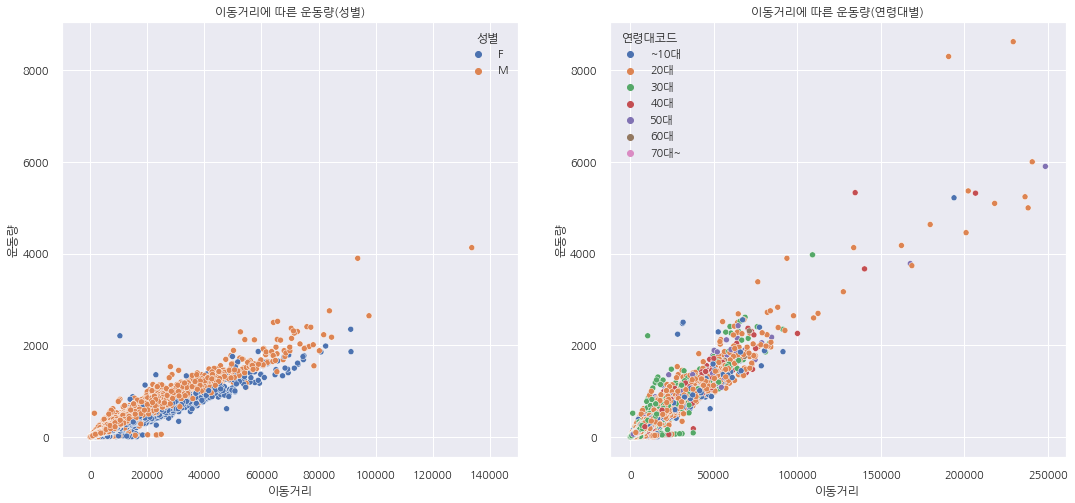

In [46]:
#운동량과 이동거리의 상관관계(runtime ~40s)
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=bike3, x='이동거리', y='운동량', ax=ax[0], hue='성별')

#데이터를 좀 더 잘 보이게 그림을 다시 그리자
ax[0].set_xlim(-10000, 150000)
ax[0].set_title('이동거리에 따른 운동량(성별)')

sns.scatterplot(data=bike3, x='이동거리', y='운동량',ax=ax[1], hue='연령대코드')
ax[1].set_title('이동거리에 따른 운동량(연령대별)')
plt.show()

###3-3. 대여일자에 따른 남녀 대여건수 비교

In [47]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [48]:
#대여일자 데이터를 년/월/일로 나누기
bike3['대여년'] = bike3['대여일자'].dt.year
bike3['대여월'] = bike3['대여일자'].dt.month
bike3['대여일'] = bike3['대여일자'].dt.day

In [49]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new,대여년,대여월,대여일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞,2021,1,1
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞,2021,1,1
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞,2021,1,1
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구,2021,1,1
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞,2021,1,1


In [51]:
#성별에 따른 사용시간 합계를 대여일별로 집계하기
bike3.pivot_table(index=bike3['대여일'], columns=bike3['성별'], values='사용시간',  aggfunc=sum)

성별,F,M
대여일,,
1,154530,234399
2,153598,234173
3,131245,217678
4,156668,267946
5,122408,222853
6,95435,166657
7,15144,45589
8,23995,66331
9,31465,82345


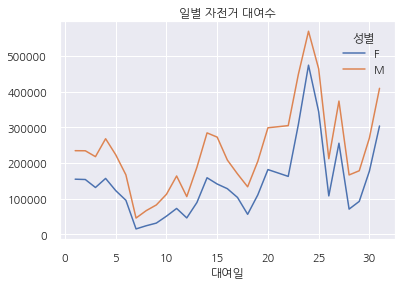

In [52]:
#위 정보를 바탕으로 대여 일별 성별에 따른 사용시간 그래프를 그려보자
bike_fm = bike3.pivot_table(index=bike3['대여일'], columns=bike3['성별'], values='사용시간',  aggfunc=sum)
bike_fm.plot(title='일별 자전거 대여수', rot=0)

###3-4. 구별 거치대 개수 지도로 나타내기

In [53]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD


In [54]:
#LCD 거치대와 QR 거치대수 합한 새 컬럼 만들기
bike1['총거치대수'] = bike1['거치대수lcd']+bike1['거치대수qr']

In [55]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD,12.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD,8.0
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR,7.0
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD,16.0


In [58]:
#구별 설치 거치대의 개수
bike_sum1 = bike1.groupby(['자치구'])[('총거치대수')].sum().reset_index()
bike_sum1 = bike_sum1.set_index('자치구')
bike_sum1.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='자치구')

In [59]:
bike_sum1

,총거치대수
자치구,
강남구,1482.0
강동구,1152.0
강북구,676.0
강서구,2029.0
관악구,827.0
광진구,1029.0
구로구,1184.0
금천구,717.0
노원구,1131.0


In [61]:
#folium으로 서울 지도위에 대여소 분포 나타내기
#folium: 지도 위에 시각화 할 때 유용하다!
import json
import folium
import warnings
#warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = '/content/drive/MyDrive/Python/06_Ddareungee/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

[대한민국 folium json map](https://krksap.tistory.com/1751)은 여기서 다운받을 수 있다.

In [62]:
#geo_str이 어떤 형태로 되어있나?
geo_str

{'features': [{'geometry': {'coordinates': [[[126.1701670531016,
       33.27833920373795],
      [126.17796199822318, 33.28904450342792],
      [126.20366562455006, 33.292582069125935],
      [126.23227804627976, 33.28054651709448],
      [126.27081469983565, 33.29305651947374],
      [126.28692516789717, 33.3095121006344],
      [126.32582807936741, 33.32307849544494],
      [126.33863040850332, 33.33700002289742],
      [126.37692773779688, 33.34348978209229],
      [126.42008790072302, 33.33448285889923],
      [126.43967991919219, 33.34042205120408],
      [126.44742456956253, 33.35529267692266],
      [126.4918716225209, 33.351283204155564],
      [126.54001194569452, 33.35949354681064],
      [126.55310458705854, 33.368769331336765],
      [126.5830715764017, 33.368027779973275],
      [126.65655971322707, 33.39658294968576],
      [126.68911351796443, 33.39691133705054],
      [126.70784071345439, 33.41819831436605],
      [126.73472429940135, 33.422146338653775],
      [126.75

In [63]:
seoul_bike1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
#tiles = 'OpenStreetMap', 'Stamen Terrain'

seoul_bike1.choropleth(
    geo_data = geo_str,
    data = bike_sum1['총거치대수'],
    columns = ['자치구','총거치대수'],
               fill_color = 'YlGnBu',
               key_on = 'feature.properties.name',
               legend_name='Number of Parking lots (%)')

seoul_bike1

###3-5.구별 대여건수 지도로 나타내기

In [ ]:
bike1.info()

In [64]:
#대여소번호 데이터 타입 변경하기
bike22['대여소번호'] = pd.to_numeric(bike22['대여소번호'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD,12.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD,8.0
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR,7.0
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD,16.0


In [66]:
bike22.head()

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,2301. 현대고등학교 건너편,202007,3997,2301,현대고등학교 건너편
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250,2302,교보타워 버스정류장(신논현역 3번출구 후면)
2,2303. 논현역 7번출구,202007,863,2303,논현역 7번출구
3,2304. 신영 ROYAL PALACE 앞,202007,334,2304,신영 ROYAL PALACE 앞
4,2305. MCM 본사 직영점 앞,202007,436,2305,MCM 본사 직영점 앞


In [67]:
#대여소명에 구 붙이기
bike_merge = pd.merge(bike1, bike22, left_on='대여소번호', right_on='대여소번호')

In [68]:
bike_merge.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수,대여소 명,대여 일자 / 월,대여 건수,대여소명_new
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202007,1556,경복궁역 7번출구 앞
1,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202008,997,경복궁역 7번출구 앞
2,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202009,1338,경복궁역 7번출구 앞
3,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202010,1478,경복궁역 7번출구 앞
4,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202011,1072,경복궁역 7번출구 앞


In [69]:
#필요한 컬럼만 남기기
bike_merge = bike_merge.drop(['설치시기', '대여소 명'], axis=1, inplace=False)

In [71]:
#202101 데이터만 사용하기
bike_merge01 = bike_merge[bike_merge['대여 일자 / 월'] == 202101]

In [72]:
bike_merge01.head(5)

,대여소번호,대여소명,자치구,거치대수lcd,거치대수qr,운영방식,총거치대수,대여 일자 / 월,대여 건수,대여소명_new
6,301,경복궁역 7번출구 앞,종로구,16.0,0.0,LCD,16.0,202101,417,경복궁역 7번출구 앞
13,302,경복궁역 4번출구 뒤,종로구,12.0,0.0,LCD,12.0,202101,714,경복궁역 4번출구 뒤
20,303,광화문역 1번출구 앞,종로구,8.0,0.0,LCD,8.0,202101,590,광화문역 1번출구 앞
27,304,광화문역 2번출구 앞,종로구,0.0,7.0,QR,7.0,202101,393,광화문역 2번출구 앞
34,305,종로구청 옆,종로구,16.0,0.0,LCD,16.0,202101,514,종로구청 옆


In [74]:
#자치구별 대여건수, 반납건수 집계하기
bike_sum2 = bike_merge01.groupby(['자치구'])[('대여 건수')].sum().reset_index()
bike_sum2 = bike_sum2.set_index('자치구')

In [75]:
bike_sum2

,대여 건수
자치구,
강남구,24689
강동구,26006
강북구,16101
강서구,75019
관악구,27457
광진구,38028
구로구,31633
금천구,13494
노원구,41993


In [76]:
seoul_bike2 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='openstreetmap')

seoul_bike2.choropleth(
    geo_data = geo_str,
    data = bike_sum2['대여 건수'],
    columns = [bike_sum2.index,bike_sum2['대여 건수']],
               fill_color = 'PuRd',
               key_on = 'feature.properties.name')

seoul_bike2

##5.Review

* 따릉이 데이터를 살펴본 결과:  
석수역1번출구 앞 (SK주유소)	에서 대여한 따릉이의 이동거리가 가장 크고, IBK기업은행 석수역 지점 앞	대여소 따릉이의 이용시간이 가장 길었다.  
* 따릉이를 이용한 남녀 간 이동거리 분포에 큰 차이는 없었으나, 남성의 운동량이 좀 더 많게 나타났다. WHY?
* 따릉이를 많이 이용하는 성별은?:  전반적으로 남성이 여성보다 따릉이를 더 많이 이용했다(대여건수 기준).
* 서울시 구별 설치 거치대의 개수는?
* 서울시 구별로 거치대 개수와 대여건수는?
